In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("penguins.csv")

In [3]:
# Drop any duplicates
df.duplicated().any()
df = df.drop_duplicates()

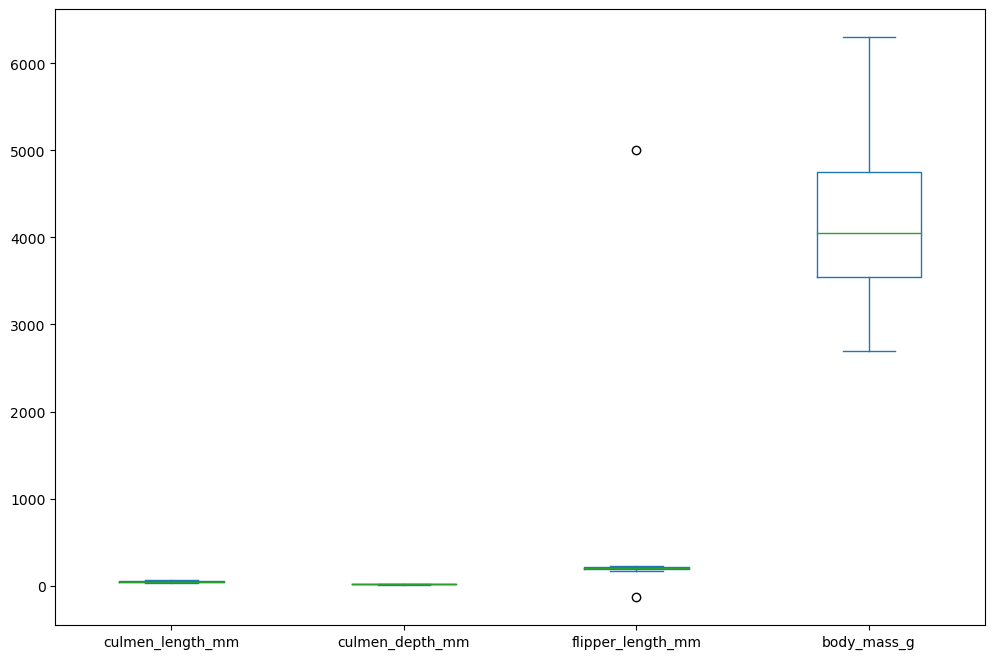

In [4]:
#Check for any outliers
df.plot(kind='box', figsize=(12,8))

#Outlier in flipper_length_mm
df = df[df['flipper_length_mm'] > 0]
df = df[df['flipper_length_mm'] < 5000]

<Axes: >

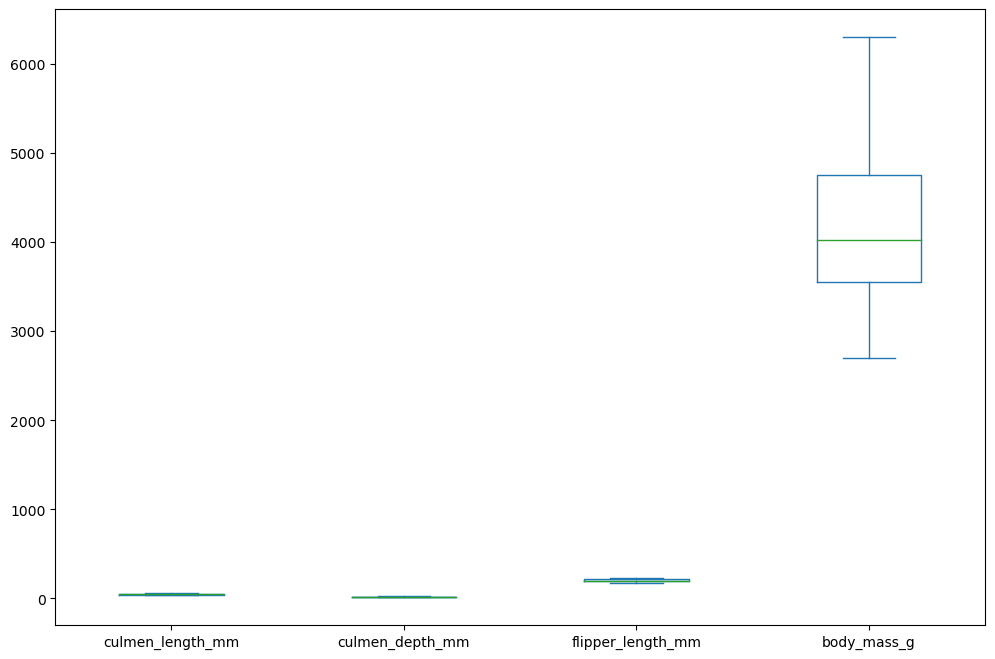

In [5]:
df.plot(kind='box', figsize=(12,8))

In [6]:
df['sex'].value_counts()

#Remove . in sex column
df = df[df['sex'] != '.']

In [7]:
df['sex'].value_counts()

sex
MALE      167
FEMALE    165
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   339 non-null    float64
 1   culmen_depth_mm    339 non-null    float64
 2   flipper_length_mm  339 non-null    float64
 3   body_mass_g        339 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.9+ KB


In [9]:
#Drop NA

df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.6+ KB


In [11]:
#Encoding
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
# features = enc.fit_transform(df[['sex']])
# df = pd.concat([df, features], axis=1).drop(df[['sex']], axis=1)

df = pd.get_dummies(df)

#LabelEncoder
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# df['sex'] = enc.fit_transform(df[['sex']])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_FEMALE         332 non-null    bool   
 5   sex_MALE           332 non-null    bool   
dtypes: bool(2), float64(4)
memory usage: 13.6 KB


In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[df.columns] = ss.fit_transform(df[df.columns])

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df[df.columns] = mm.fit_transform(df[df.columns])

c:\Users\jacks\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


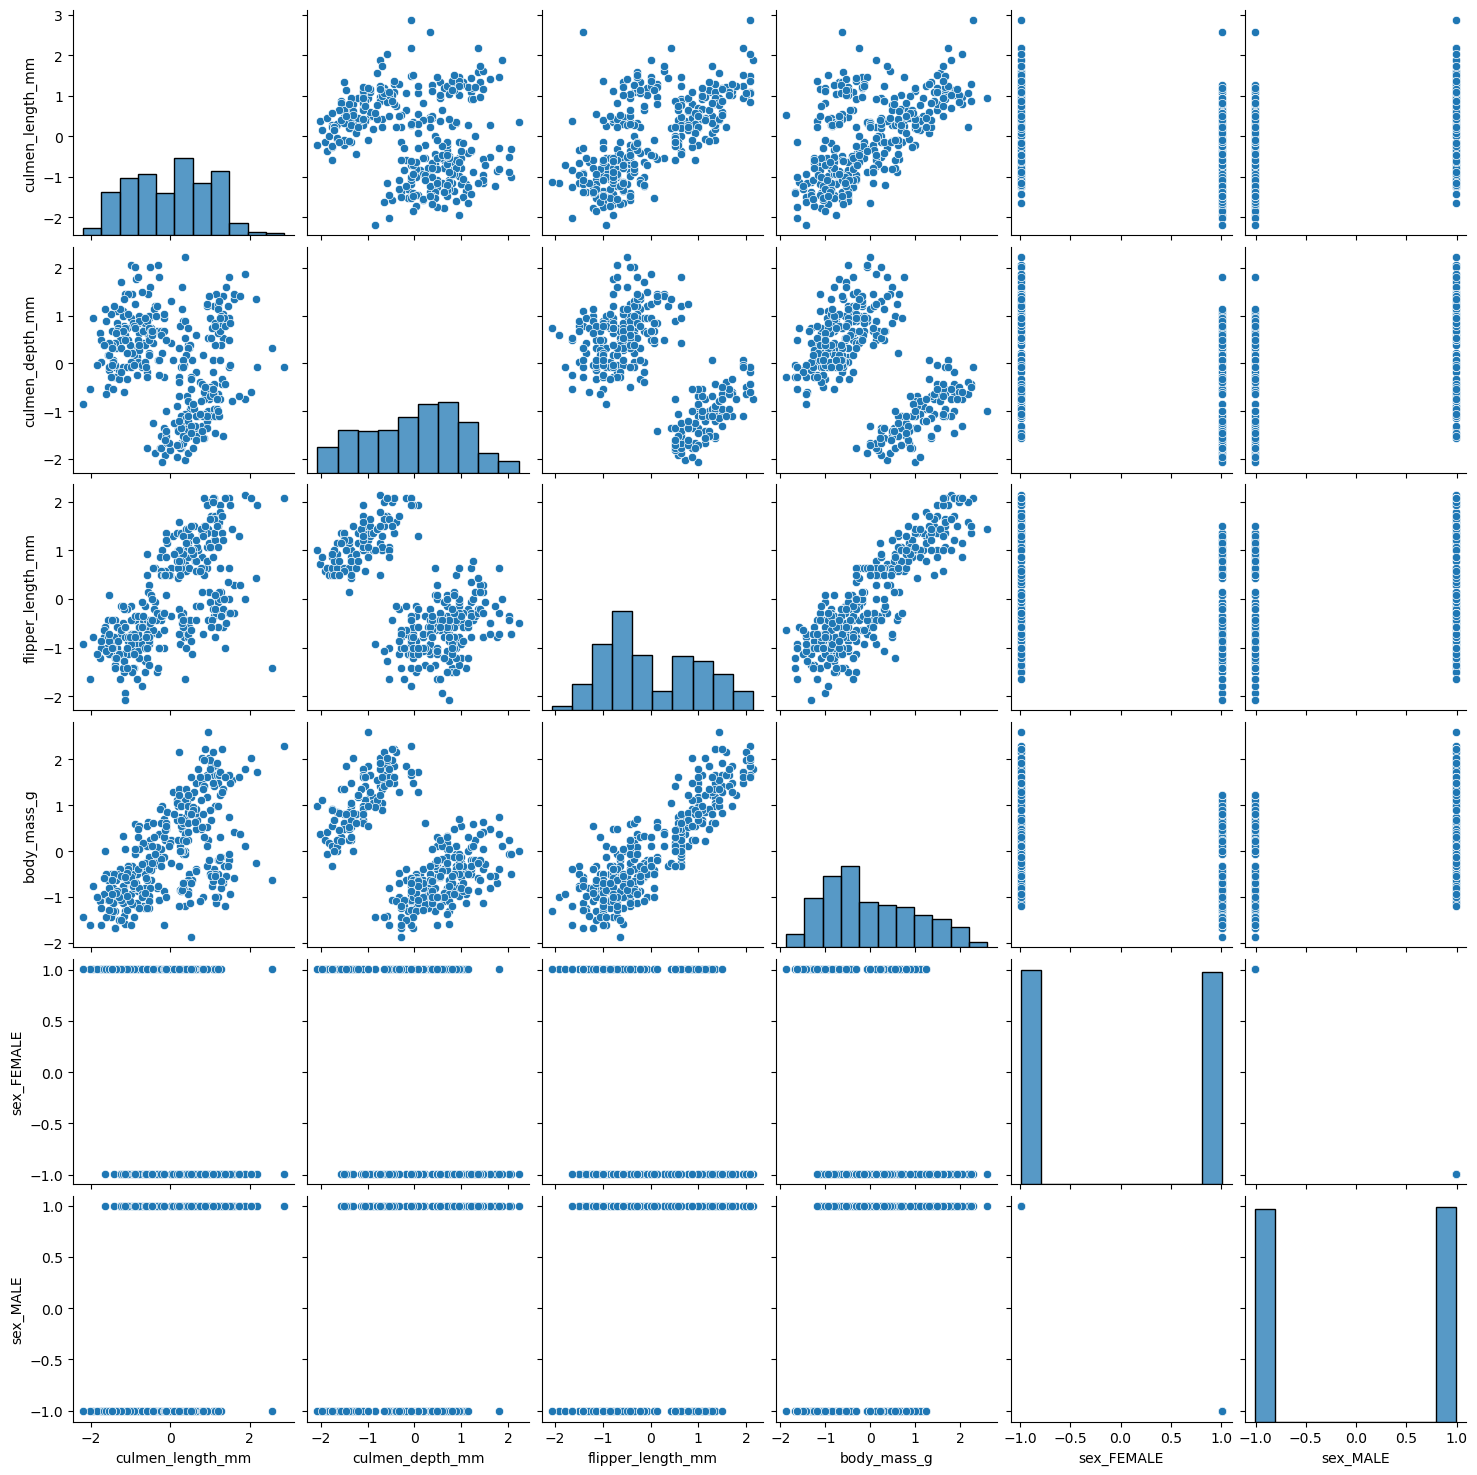

In [14]:
sb.pairplot(df)
#Looks linear

<Axes: >

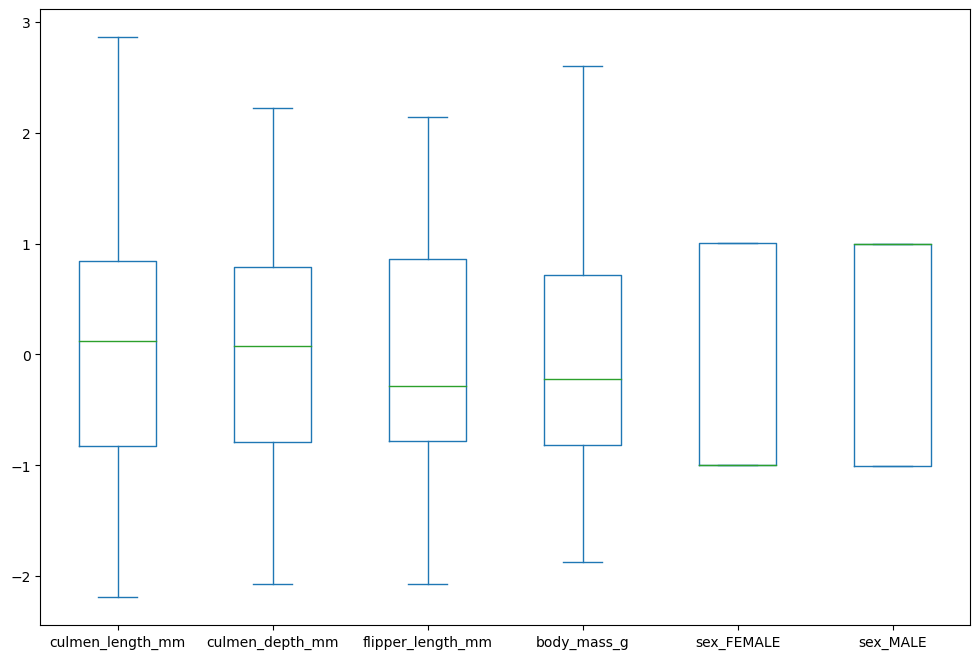

In [15]:
df.plot(kind='box', figsize=(12, 8))

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df = pd.DataFrame(pca.fit_transform(df), columns=['P1', 'P2'])

#If NonLinear
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components=2, kernel='rbf')
# df = pd.DataFrame(kpca.fit_transform(df), columns=['P1', 'P2'])

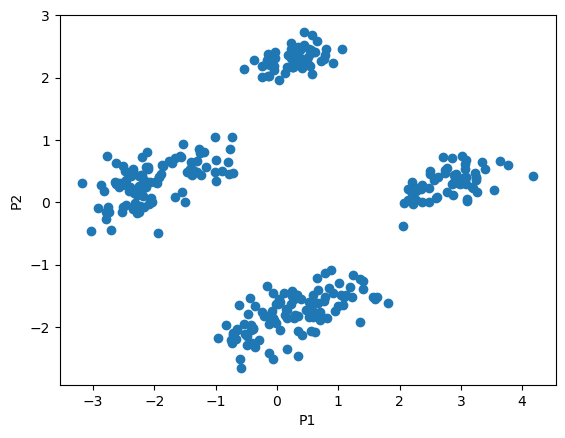

In [17]:
plt.scatter(df['P1'], df['P2'])
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()

c:\Users\jacks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jacks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jacks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jacks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

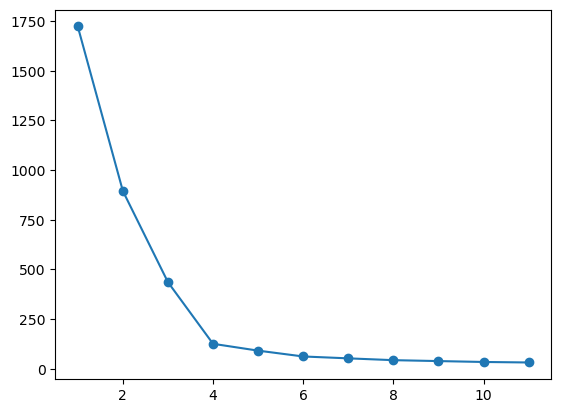

In [18]:
#K-Means
#Elbow Method?
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 12), wcss, marker="o")
plt.show()

c:\Users\jacks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jacks\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


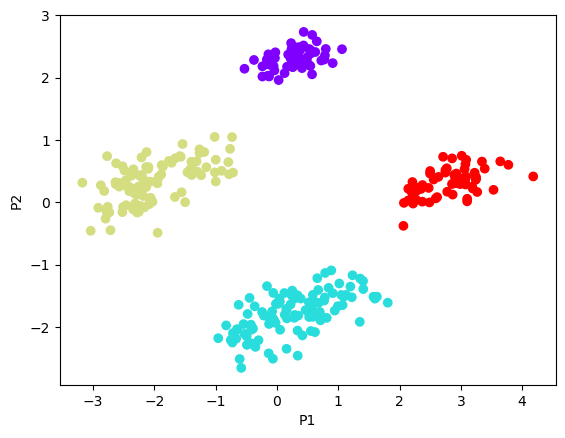

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans_y = kmeans.fit_predict(df)

plt.scatter(df['P1'], df['P2'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()

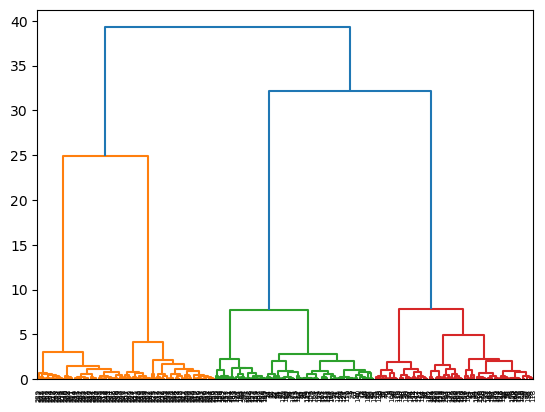

In [20]:
#Hierarchy clustering
import scipy.cluster.hierarchy as chr

chr.dendrogram(chr.linkage(df, method='ward', metric='euclidean'))
plt.show()

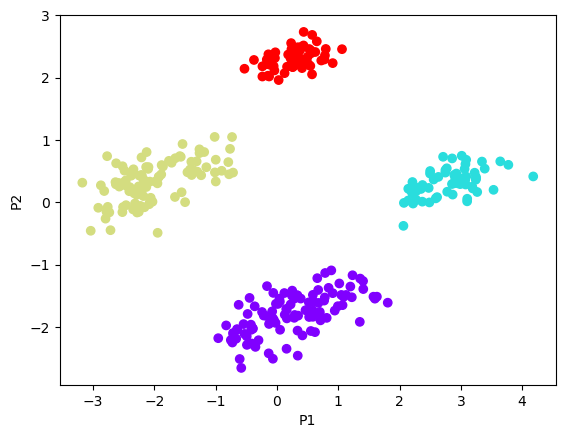

In [21]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
agc_y = agc.fit_predict(df)

plt.scatter(df['P1'], df['P2'], c=agc.labels_, cmap='rainbow')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()

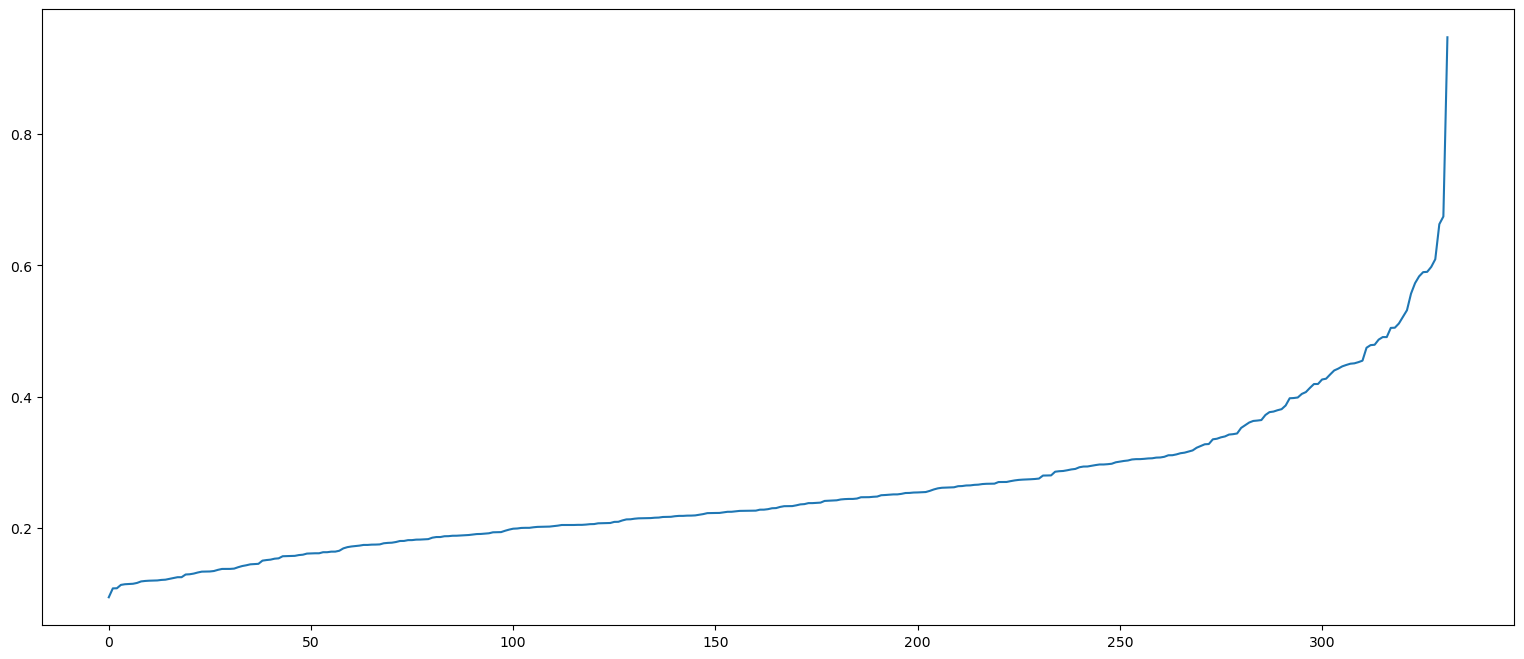

In [22]:
#DBSCAN
from sklearn.neighbors import NearestNeighbors

k = 10
nn = NearestNeighbors(n_neighbors=k)
nn_fit = nn.fit(df)
distances, ind = nn_fit.kneighbors(df)

distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(19,8))
plt.plot(distances)
plt.show()

4 0


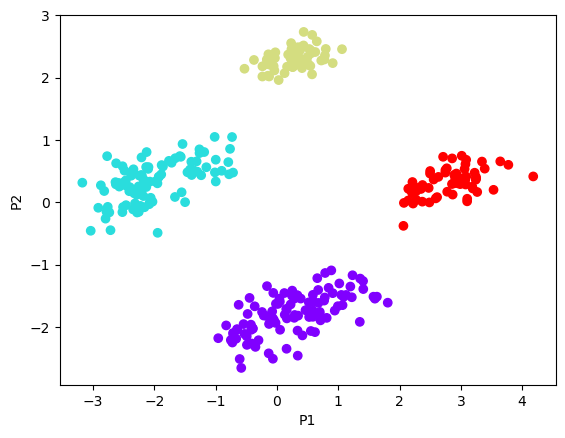

In [23]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.6, min_samples=k)
db_y = db.fit_predict(df)

db_cluster = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
db_noise = list(db.labels_).count(-1)

print(db_cluster, db_noise)

plt.scatter(df['P1'], df['P2'], c=db.labels_, cmap='rainbow')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()